# Gesture Model Exploration
In this notebook, I will be training a fully connected deep neural network to classify differente hand gestures.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, utils
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Input 
from tensorflow.keras.utils import to_categorical 
from sklearn.model_selection import train_test_split

FILE_PATH = "C:/Users/natec/Documents/Coding/finger-jams/datasets"

## Binary Classifier

We will start small by training a binary classifier to recognize the first hand gesture (one finger pointing up). Lets load our preprocessed data and check the shape.

In [3]:
# Load Data
# Load class 1 data
data_pos_1 = np.load(f"{FILE_PATH}/processed/pos_1_data_processed.npz")
X1 = data_pos_1['coords']
y1 = data_pos_1['labels']
print(f"X1 shape: {X1.shape}")
print(f"y1 shape: {y1.shape}")

# Load class 0 data
data_pos_0 = np.load(f"{FILE_PATH}/processed/pos_0_data_processed.npz")
X0 = data_pos_0['coords']
y0 = data_pos_0['labels']
print(f"X0 shape: {X0.shape}")
print(f"y0 shape: {y0.shape}")

# Concatenate
X = np.concatenate([X1, X0], axis=0)
y = np.concatenate([y1, y0], axis=0)
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X1 shape: (100, 21, 3)
y1 shape: (100,)
X0 shape: (100, 21, 3)
y0 shape: (100,)
X shape: (200, 21, 3)
y shape: (200,)


Our results add up. I took 100 samples for class one and 100 samples for class zero, which is the class containing all other gestures that aren't recognized. Each sample is 21 x 3 because there are 21 hand landmarks, each with a x-y-z value. Also, the y shape should be equal to the number of samples and should be a vector, because it only contains the labels for each sampel. To train our neural network, we must reshape each sample from a matrix into a vector. The result should be 200 x 63. 

In [ ]:
# Reshape Data
X = X.reshape((X.shape[0], -1))
print(f"X new shape: {X.shape}")

This looks good. Lets split the dataset into training and testing sets

In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We'll start with a three layer neural network and use sigmoid as the last activation function. This will give us a probability that the sample is class one or not.

In [ ]:
model = keras.Sequential([
    layers.Dense(128, input_shape=(63,), activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [ ]:
my_model = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=50,
    epochs=40
)

my_model_df = pd.DataFrame(my_model.history)
my_model_df.loc[:,['loss','val_loss']].plot(title="Cross-entropy")
my_model_df.loc[:, ['binary_accuracy','val_binary_accuracy']].plot(title="Accuracy")

In [ ]:
model.save('hand_gesture_model_2.keras')

### Results
After testing the model, I can say that it works very well. There are some slight improvements to be made though. When I point my middle finger left or right, the accuracy seems to be less. I need to add a normalization to the alignment. 

In [ ]:
sample = pd.DataFrame(X1[45], columns = ['x','y','z'])

print(sample)

## Recognizing Three Classes
Lets add one more class and use the softmax activation function to classify with three gestures now!

In [ ]:
# Lets try three classes now and add in the peace sign
data_pos_2 = np.load(f"{FILE_PATH}/processed/pos_2_data_processed.npz")
X2 = data_pos_2['coords']
y2 = data_pos_2['labels']
print(f"X2 shape: {X2.shape}")
print(f"y2 shape: {y2.shape}")
# Concatenate
X = np.concatenate([X0, X1, X2], axis=0)
y = np.concatenate([y0, y1, y2], axis=0)
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

In [ ]:
# Reshape Data
X = X.reshape((X.shape[0], -1))
print(f"X new shape: {X.shape}")

In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model_2 = keras.Sequential([
    layers.Dense(128, input_shape=(63,), activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax'),
])
model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [ ]:
my_model_2 = model_2.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=50,
    epochs=40
)

my_model_df = pd.DataFrame(my_model_2.history)
my_model_df.loc[:,['loss','val_loss']].plot(title="Cross-entropy")
my_model_df.loc[:, ['accuracy','val_accuracy']].plot(title="Accuracy")

In [ ]:
print(X_test[0].shape)

In [ ]:
sample = X_test[0].reshape(1,-1)
prediction = model_2.predict(sample)
print(prediction)

In [ ]:
model_2.save('hand_gesture_model_2.keras')

### Results
Again, this model trained very well! I tested the classifier with the live feed and it seemed to pick up changes very quickly. I still am facing the issue when I tilt my hand sideways though... Lets try and add all the classes first though!

## Adding all the classes

In [ ]:
X_list = []
y_list = []
for i in range(8):
    data = np.load(f"{FILE_PATH}/processed/pos_{i}_data_processed.npz")
    X_list.append(data['coords'])
    y_list.append(data['labels'])
X = np.concatenate(X_list, axis=0)
y = np.concatenate(y_list, axis=0)
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

In [ ]:
# Reshape Data
X = X.reshape((X.shape[0], -1))
print(f"X new shape: {X.shape}")

In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model_3 = keras.Sequential([
    layers.Dense(128, input_shape=(63,), activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(8, activation='softmax'),
])
model_3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [ ]:
my_model_3 = model_3.fit(
    X, y,
    batch_size=50,
    epochs=40
)

my_model_df = pd.DataFrame(my_model_3.history)
my_model_df.loc[:,['loss']].plot(title="Cross-entropy")
my_model_df.loc[:,['accuracy']].plot(title="Accuracy")

In [ ]:
model_3.save('hand_gesture_model_3.keras')

### Results
This one turned out to be much more problematic. The model overfit way too much. For example, it only recognized a 5 if I stretch my thumb as far as I can, and it only recognized a four if I spread my fingers as far apart as I could. It really only successfully recognized three classes. 

## Generalizing the model
I need to generalize the model more to prevent it from memorizing the training data. Lets try the following solutions: collect more data, reduce the size of the network, add early callback, and add dropout.

We'll also create a function to load the files quickly and then add 300 more samples to each class

In [ ]:
def load_data(files):
    X_list = []
    y_list = []
    for file in files:
        data = np.load(f"{FILE_PATH}/processed/{file}.npz")
        X_list.append(data['coords'])
        y_list.append(data['labels'])
        print(f"{file} length: {len(data['labels'])}")
        print(f"label: {data['labels'][0]}")
    X = np.concatenate(X_list, axis=0)
    y = np.concatenate(y_list, axis=0)
    return X, y

In [ ]:
files = ['pos_0_data_processed', 'pos_0_data_1_processed', 
         'pos_1_data_processed', 'pos_1_data_1_processed',
         'pos_2_data_processed', 'pos_2_data_1_processed',
         'pos_3_data_processed', 'pos_3_data_1_processed',
         'pos_4_data_processed', 'pos_4_data_1_processed',
         'pos_5_data_processed', 'pos_5_data_1_processed',
         'pos_6_data_processed', 'pos_6_data_1_processed',
         'pos_7_data_processed', 'pos_7_data_1_processed']

In [ ]:
X, y = load_data(files)
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
X = X.reshape((X.shape[0], -1))
print(f"X new shape: {X.shape}")

In [ ]:

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_4 = keras.Sequential([
    layers.Dense(64, input_shape=(63,), activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(8, activation='softmax'),
])
model_4.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
my_model_4 = model_4.fit(
    X_train, y_train,
    validation_data = (X_test,y_test),
    epochs=100,
    batch_size = 40,
    callbacks=[callback]
)

my_model_df = pd.DataFrame(my_model_4.history)
my_model_df.loc[:,['loss']].plot(title="Cross-entropy")
my_model_df.loc[:,['accuracy']].plot(title="Accuracy")

In [ ]:
model_4.save('hand_gesture_model_4.keras')

In [ ]:
X, y = load_data(files[:10])
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
X = X.reshape((X.shape[0], -1))
print(f"X new shape: {X.shape}")

### Results
This model still had many problems, but it was better. It seems like its still having trouble distinguishing between similar classes such as 4 and 5 or 6 and 7. Lets add 300 more samples to each class for a total of 100 + 300 + 300 = 700 samples

## Adding More Training Data

In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_5 = keras.Sequential([
    layers.Dense(64, input_shape=(63,), activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(5, activation='softmax'),
])
model_5.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
my_model_5 = model_5.fit(
    X_train, y_train,
    validation_data = (X_test,y_test),
    epochs=100,
    batch_size = 40,
    callbacks=[callback]
)

my_model_df = pd.DataFrame(my_model_5.history)
my_model_df.loc[:,['loss']].plot(title="Cross-entropy")
my_model_df.loc[:,['accuracy']].plot(title="Accuracy")

In [ ]:
model_5.save('hand_gesture_model_5.keras')

In [ ]:
files = ['pos_0_data_processed', 'pos_0_data_1_processed',
         'pos_1_data_processed', 'pos_1_data_1_processed', 'pos_1_data_2_processed',
         'pos_2_data_processed', 'pos_2_data_1_processed', 'pos_2_data_2_processed',
         'pos_3_data_processed', 'pos_3_data_1_processed', 'pos_3_data_2_processed',
         'pos_4_data_processed', 'pos_4_data_1_processed', 'pos_4_data_2_processed',
         'pos_5_data_processed', 'pos_5_data_1_processed', 'pos_5_data_2_processed',
         'pos_6_data_processed', 'pos_6_data_1_processed', 'pos_6_data_2_processed',
         'pos_7_data_processed', 'pos_7_data_1_processed', 'pos_7_data_2_processed']

In [ ]:
X, y = load_data(files)
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
X = X.reshape((X.shape[0], -1))
print(f"X new shape: {X.shape}")

In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_6 = keras.Sequential([
    layers.Dense(64, input_shape=(63,), activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(8, activation='softmax'),
])
model_6.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
my_model_6 = model_6.fit(
    X_train, y_train,
    validation_data = (X_test,y_test),
    epochs=100,
    batch_size = 40,
    callbacks=[callback]
)

my_model_df = pd.DataFrame(my_model_6.history)
my_model_df.loc[:,['loss']].plot(title="Cross-entropy")
my_model_df.loc[:,['accuracy']].plot(title="Accuracy")

In [ ]:
model_6.save('hand_gesture_model_6.keras')

## Results
This model was a little better... but it still is far off from what I want it to be. It has the biggest trouble distinguishing between 6 and 7 because the only difference is the thumb being extended or tucked in. Lets add another thumb feature so that it can better distinguish the two classes. We can use the angle of the thumb as a feature!

In [ ]:
def load_data_with_angles(folder, files):
    X_list = []
    y_list = []
    for file in files:
        data = np.load(f"{FILE_PATH}/{folder}/{file}.npz")
        
        coords = data['coords']
        angles = data['angles']

        coords = coords.reshape(coords.shape[0], -1) # n, 63
        X_data = np.concatenate([coords, angles], axis=1)


        X_list.append(X_data)
        y_list.append(data['labels'])
        print(f"{file} length: {len(data['labels'])}")
        print(f"label: {data['labels'][0]}")
    X = np.concatenate(X_list, axis=0)
    y = np.concatenate(y_list, axis=0)
    return X, y

Lets add the new features with the thumb angle and see if this model performs better

In [ ]:
files = ['pos_0_data_processed_with_angles', 'pos_0_data_1_processed_with_angles',
         'pos_1_data_processed_with_angles', 'pos_1_data_1_processed_with_angles', 'pos_1_data_2_processed_with_angles',
         'pos_2_data_processed_with_angles', 'pos_2_data_1_processed_with_angles', 'pos_2_data_2_processed_with_angles',
         'pos_3_data_processed_with_angles', 'pos_3_data_1_processed_with_angles', 'pos_3_data_2_processed_with_angles',
         'pos_4_data_processed_with_angles', 'pos_4_data_1_processed_with_angles', 'pos_4_data_2_processed_with_angles',
         'pos_5_data_processed_with_angles', 'pos_5_data_1_processed_with_angles', 'pos_5_data_2_processed_with_angles',
         'pos_6_data_processed_with_angles', 'pos_6_data_1_processed_with_angles', 'pos_6_data_2_processed_with_angles',
         'pos_7_data_processed_with_angles', 'pos_7_data_1_processed_with_angles', 'pos_7_data_2_processed_with_angles']
folder = 'processed_with_angles'


In [ ]:
X, y = load_data_with_angles(folder, files)
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_7 = keras.Sequential([
    layers.Dense(64, input_shape=(65,), activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(8, activation='softmax'),
])
model_7.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
my_model_7 = model_7.fit(
    X_train, y_train,
    validation_data = (X_test,y_test),
    epochs=100,
    batch_size = 40,
    callbacks=[callback]
)

my_model_df = pd.DataFrame(my_model_7.history)
my_model_df.loc[:,['loss']].plot(title="Cross-entropy")
my_model_df.loc[:,['accuracy']].plot(title="Accuracy")

In [ ]:
model_7.save('hand_gesture_model_7.keras')

### Results
My model is still very inaccurate. It is very suspicious that the testing data is recieving such high scores, yet it fails to recognize simple gestures on the live feed. There may be an issue with my preprocessing pipeline. Lets inspect it closely...

In [ ]:

from normalize_utils import normalize_psar, normalize_lpsar, compute_thumb_angle

model = tf.keras.models.load_model('./hand_gesture_model_7.keras')

results = []


sample = np.load("./Data/processed_with_angles/pos_1_data_processed_with_angles.npz") # Get x, y, z coordinates for each 21 landmark objects
data = sample['coords']
coordinates = data[1]
# Convert to panda
coordinates = np.array(coordinates, dtype=np.float64)


data = normalize_psar(coordinates)

sin, cos = compute_thumb_angle(data)

data = data.reshape(1,-1)
angles = np.array([sin, cos], dtype=np.float64).reshape(1,2)
#data = data.reshape(-1, 3)
print(data)
print(angles)
data = np.concatenate([data, angles], axis=1)


# Make predictions and print
predictions = model.predict_on_batch(data)
predicted_class = int(np.argmax(predictions[0]))
confidence = float(predictions[0][predicted_class])
results.append([predicted_class, confidence])

print(results)


[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.95497224e-01
   9.12873229e-02  0.00000000e+00  3.72241408e-01  2.94937547e-01
   2.97379612e-02  4.27925846e-01  5.37120260e-01  9.70269234e-02
   3.37557183e-01  7.61651673e-01  2.03982894e-01  1.63934751e-01
   9.03970381e-01 -8.48208300e-02  2.10286785e-01  1.34666838e+00
  -2.71507629e-02  2.30525987e-01  1.63907172e+00  4.35674219e-02
   2.44237480e-01  1.88449821e+00  8.85098311e-02  1.11440660e-09
   1.00000000e+00  3.89646178e-10  1.29012413e-01  1.04213139e+00
   1.74196218e-01  1.93455308e-01  6.57356145e-01  3.17517029e-01
   2.13244261e-01  4.07684020e-01  3.82551222e-01 -1.47844637e-01
   1.01808213e+00  1.03251621e-01  9.30572424e-03  9.36392008e-01
   2.60452620e-01  6.40108734e-02  5.94958624e-01  3.36039874e-01
   7.62185346e-02  4.08769847e-01  3.59617905e-01 -2.70653389e-01
   9.77440365e-01  2.27469305e-01 -1.31600171e-01  9.01252959e-01
   2.95844064e-01 -6.01507207e-02  6.31340590e-01  3.32850096e-01
  -4.16661

## Fixing Image Mirroring
Because of the multiple failures I have receiving great results in my testing data, I realized I should inspect my data pipeline more closely. It turns out, that when I was using data_collection.py to collect data, I flipped the image AFTER getting collecting the coordinates, but when I actually tested my model, I flipped the image before. This caused all my data I collected to be viewed as a left hand even though I was using my right. So now, I have recollected 400 samples of each class and ensured that the data represents a right hand before being collected. Lets now try training a model.

In [4]:
files = [ 'pos_0_data_3_processed',
         'pos_1_data_3_processed',
         'pos_2_data_3_processed',
         'pos_3_data_3_processed',
         'pos_4_data_3_processed',
         'pos_5_data_3_processed',
         'pos_6_data_3_processed',
         'pos_7_data_3_processed']

In [7]:
X, y = load_data_with_angles(files)
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

pos_0_data_3_processed length: 400
label: 0
pos_1_data_3_processed length: 400
label: 1
pos_2_data_3_processed length: 400
label: 2
pos_3_data_3_processed length: 400
label: 3
pos_4_data_3_processed length: 400
label: 4
pos_5_data_3_processed length: 400
label: 5
pos_6_data_3_processed length: 400
label: 6
pos_7_data_3_processed length: 400
label: 7
X shape: (3200, 65)
y shape: (3200,)


In [8]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_9 = keras.Sequential([
    layers.Dense(64, input_shape=(65,), activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(8, activation='softmax'),
])
model_9.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

c:\Users\natec\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1630 - loss: 2.1093 - val_accuracy: 0.5469 - val_loss: 1.7340
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4282 - loss: 1.6894 - val_accuracy: 0.6922 - val_loss: 1.1788
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5766 - loss: 1.2289 - val_accuracy: 0.8484 - val_loss: 0.8091
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6625 - loss: 0.9322 - val_accuracy: 0.9000 - val_loss: 0.5881
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7437 - loss: 0.7607 - val_accuracy: 0.9156 - val_loss: 0.4759
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7832 - loss: 0.6329 - val_accuracy: 0.9187 - val_loss: 0.3931
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8294 - loss: 0.5452 - val_accuracy: 0.9453 - val_loss: 0.3265
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8385 - loss: 0.4691 - val_accuracy: 0.9328 - v

<Axes: title={'center': 'Accuracy'}>

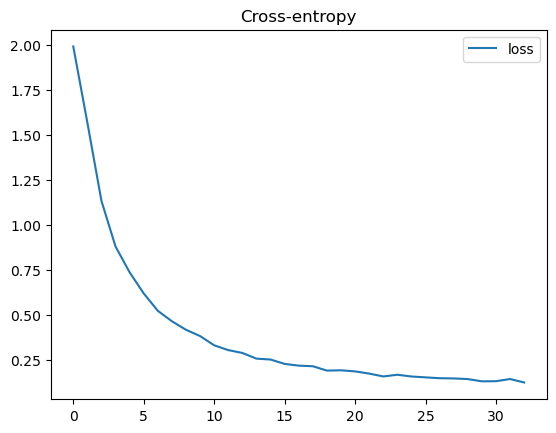

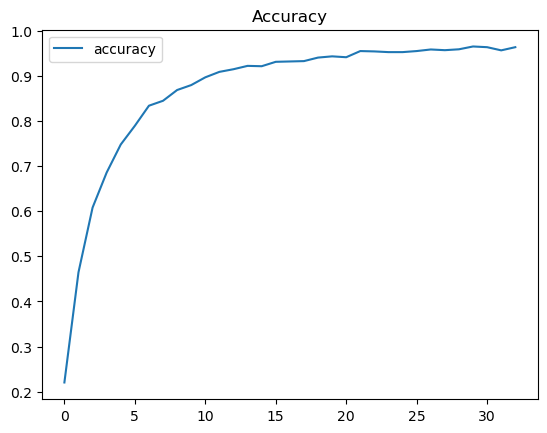

In [9]:
my_model_9 = model_9.fit(
    X_train, y_train,
    validation_data = (X_test,y_test),
    epochs=100,
    batch_size = 40,
    callbacks=[callback]
)

my_model_df = pd.DataFrame(my_model_9.history)
my_model_df.loc[:,['loss']].plot(title="Cross-entropy")
my_model_df.loc[:,['accuracy']].plot(title="Accuracy")

In [10]:
model_9.save('hand_gesture_model_9.keras')

## Results
My model worked excellently! Fixing the data pipeline proved to be a huge help in the final model. Also, with feature creation using the thumb angle, the model successfully distinguishes between similar hand gestures!